In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

In [3]:
stroke = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
print(stroke.isnull().sum())
print(stroke.duplicated().sum())
print(stroke.shape)
print(stroke.info())
print(stroke.describe())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
0
(5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null  

Preprocessing

In [5]:
stroke.drop(columns=["id","gender"], inplace=True)

In [6]:
# Fill NaN values in specific columns with the median
columns_to_fill = ['bmi']
stroke[columns_to_fill] = stroke[columns_to_fill].fillna(stroke[columns_to_fill].median())

In [7]:
#distribution of the stroke status column

stroke_status_count = stroke['stroke'].value_counts()
fig_stroke_status = px.pie(stroke_status_count, 
                         names=stroke_status_count.index, 
                         title='stroke Approval Status')
fig_stroke_status.show()

In [8]:
# distribution of the gender column
gender_count = stroke['smoking_status'].value_counts()
fig_gender = px.bar(gender_count, 
                    x=gender_count.index, 
                    y=gender_count.values, 
                    title='Gender Distribution')
fig_gender.show()

In [9]:
# distribution of the martial status column
married_count = stroke['hypertension'].value_counts()
fig_married = px.bar(married_count, 
                     x=married_count.index, 
                     y=married_count.values, 
                     title='Marital Status Distribution')
fig_married.show()

In [10]:
# distribution of the martial status column
married_count = stroke['heart_disease'].value_counts()
fig_married = px.bar(married_count, 
                     x=married_count.index, 
                     y=married_count.values, 
                     title='Marital Status Distribution')
fig_married.show()

In [11]:
# distribution of the martial status column
married_count = stroke['work_type'].value_counts()
fig_married = px.bar(married_count, 
                     x=married_count.index, 
                     y=married_count.values, 
                     title='Marital Status Distribution')
fig_married.show()

In [12]:
# distribution of the martial status column
married_count = stroke['Residence_type'].value_counts()
fig_married = px.bar(married_count, 
                     x=married_count.index, 
                     y=married_count.values, 
                     title='Marital Status Distribution')
fig_married.show()

In [13]:
# distribution of the martial status column
married_count = stroke['ever_married'].value_counts()
fig_married = px.bar(married_count, 
                     x=married_count.index, 
                     y=married_count.values, 
                     title='Marital Status Distribution')
fig_married.show()

In [14]:
# distribution of the Applicant Income column
fig_applicant_income = px.histogram(stroke, x='age', 
                                    title='age Distribution')
fig_applicant_income.show()

In [15]:
# distribution of the Applicant Income column
fig_applicant_income = px.histogram(stroke, x='bmi', 
                                    title='age Distribution')
fig_applicant_income.show()

In [16]:
# distribution of the Applicant Income column
fig_applicant_income = px.histogram(stroke, x='avg_glucose_level', 
                                    title='age Distribution')
fig_applicant_income.show()

In [17]:
# relationship between the property area and the loan status
fig_property_area = px.histogram(stroke, x='ever_married', color='stroke', 
                                 barmode='group',
                                title='Loan_Status vs Property_Area')
fig_property_area.show()

In [18]:
# relationship between the property area and the loan status
fig_property_area = px.histogram(stroke, x='bmi', color='stroke', 
                                 barmode='group',
                                title='Loan_Status vs Property_Area')
fig_property_area.show()

Convert to numeric

In [19]:
counts1 = stroke["ever_married"].value_counts()
counts2 = stroke["work_type"].value_counts()
counts3 = stroke["Residence_type"].value_counts()
counts4 = stroke["smoking_status"].value_counts()
print(counts1)
print(counts2)
print(counts3)
print(counts4)

ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [20]:
def numeric (num):

  num = pd.get_dummies(num, columns=['Residence_type'])
  num["ever_married"] = num["ever_married"].map({"Yes":2,"No":1})
  num["work_type"] = num["work_type"].map({"Private":5,"Self-employed":4,"children":3,"Govt_job":2,"Never_worked":1})
  num["smoking_status"] = num["smoking_status"].map({"never smoked":4,"Unknown":3,"formerly smoked":2,"smokes":1})

  return num

In [21]:
stroke = numeric (stroke)

take corrolation

In [22]:
# take corrulation that figure out the efects of each column on levelstress
corr = stroke.corr()
corr["stroke"].sort_values(ascending=False)

stroke                  1.000000
age                     0.245257
heart_disease           0.134914
avg_glucose_level       0.131945
hypertension            0.127904
ever_married            0.108340
bmi                     0.036110
work_type               0.032098
Residence_type_Urban    0.015458
Residence_type_Rural   -0.015458
smoking_status         -0.030682
Name: stroke, dtype: float64

In [23]:
corr_matrix = stroke.corr()

fig = go.Figure(data=go.Heatmap(z=corr_matrix.values,
                                x=corr_matrix.columns,
                                y=corr_matrix.columns,
                                colorscale='Viridis'))
fig.update_layout(title='Correlation Matrix')
fig.show()

In [24]:
def add (ad):

  ad["age/ever_married"] = ad["age"]/ad["ever_married"]
  ad["bmi/age"] = ad["bmi"]/ad["age"]
  ad["age/bmi"] = ad["age"]/ad["bmi"]
  ad["ever_married/bmi"] = ad["ever_married"]/ad["bmi"]
  ad["bmi/ever_married"] = ad["bmi"]/ad["ever_married"]

  return ad

In [25]:
stroke = add(stroke)

solve outliers

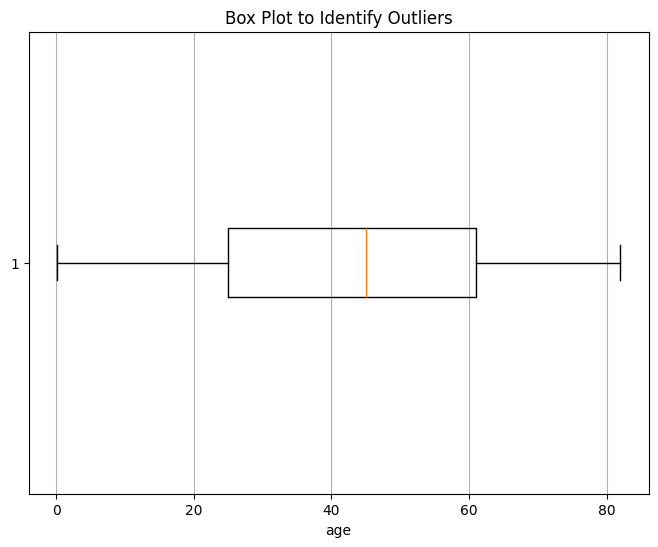

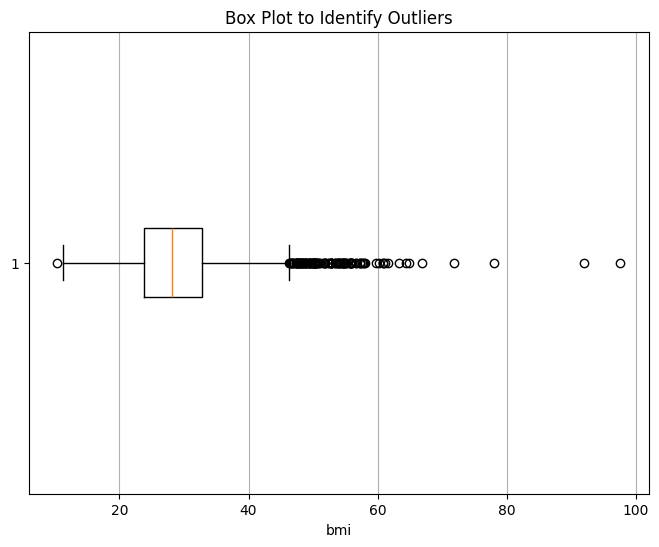

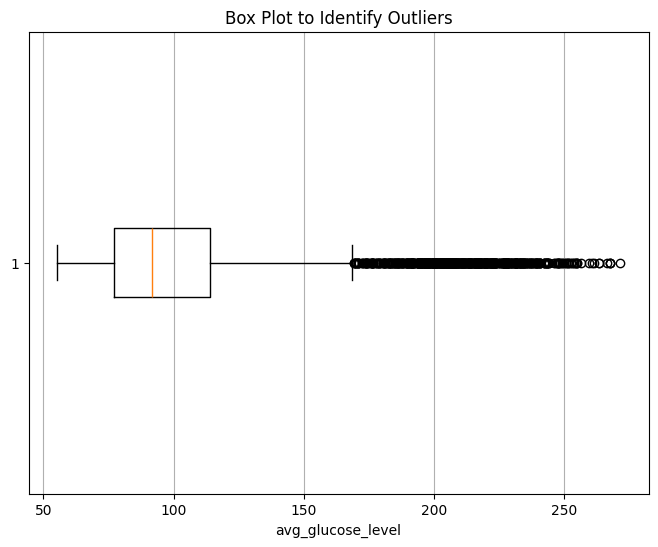

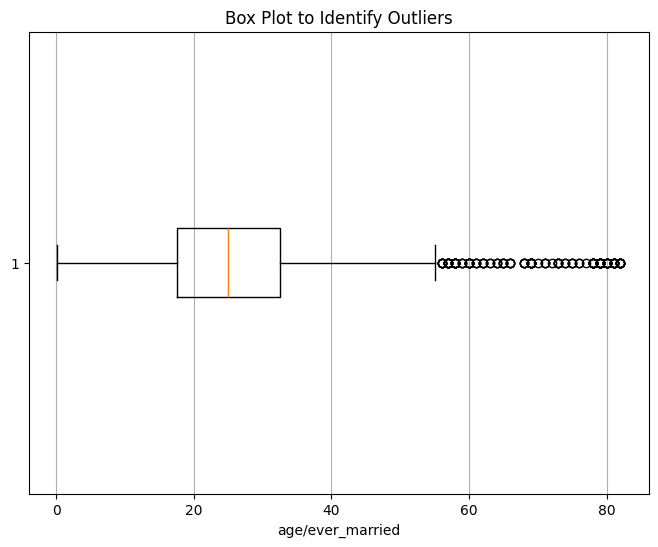

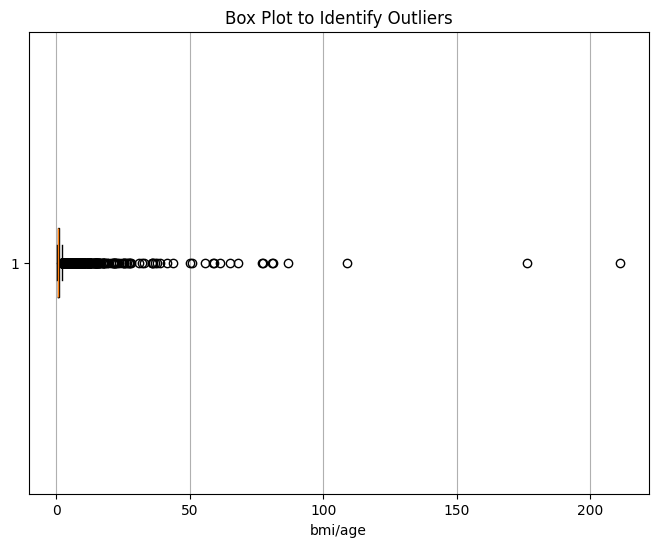

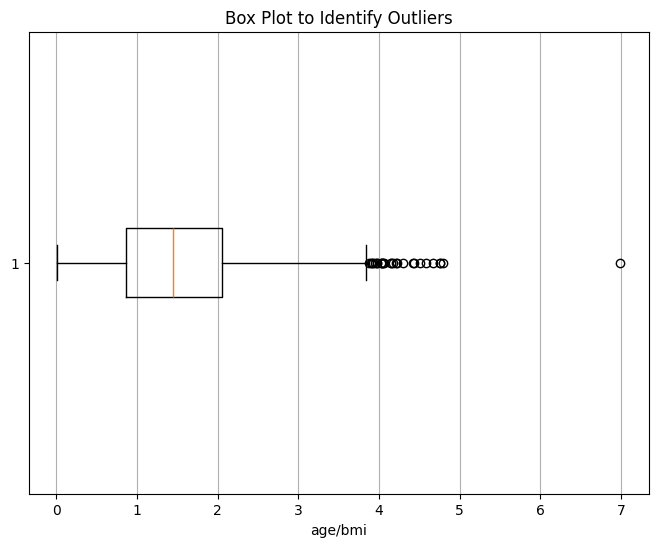

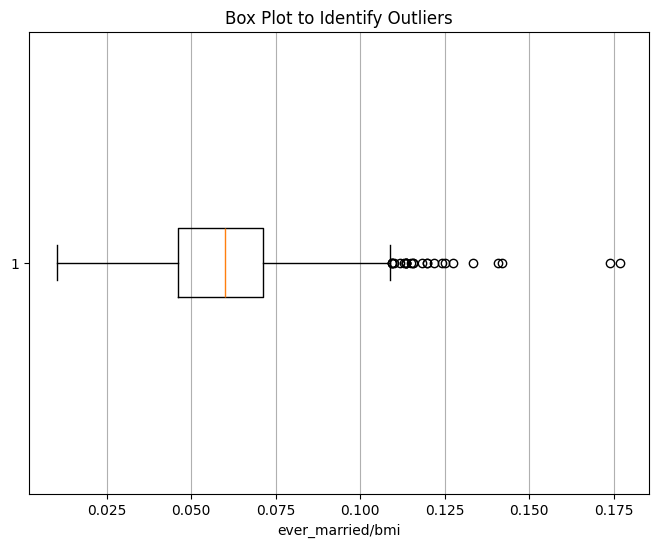

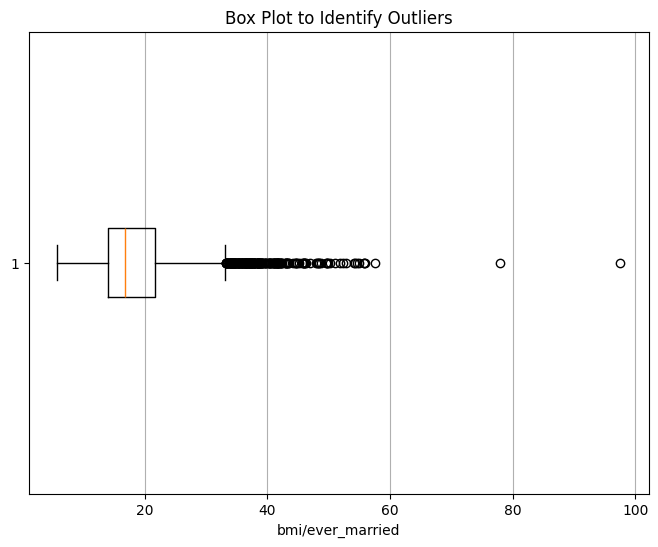

In [26]:
col = ["age","bmi","avg_glucose_level","age/ever_married",	"bmi/age",	"age/bmi"	,"ever_married/bmi",	"bmi/ever_married"]

for i in col:

  plt.figure(figsize=(8, 6))
  plt.boxplot(stroke[i], vert=False)
  plt.title('Box Plot to Identify Outliers')
  plt.xlabel(i)
  plt.grid(axis='x')
  plt.show()

In [27]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
col = ["age","bmi","avg_glucose_level","age/ever_married",	"bmi/age",	"age/bmi"	,"ever_married/bmi",	"bmi/ever_married"]

for i in col:
  Q1 = stroke[i].quantile(0.25)
  Q3 = stroke[i].quantile(0.75)
  IQR = Q3 - Q1

  # Identify outliers
  outliers = stroke[(stroke[i] < (Q1 - 1.5 * IQR)) | (stroke[i] > (Q3 + 1.5 * IQR))]

  # print("\nOutlier Rows using IQR:")
  # print(outliers)
  # print(outliers.sum())
  # Count the number of outliers
  num_outliers = outliers.shape[0]

  print("Number of outliers using IQR:", num_outliers)

Number of outliers using IQR: 0
Number of outliers using IQR: 126
Number of outliers using IQR: 627
Number of outliers using IQR: 132
Number of outliers using IQR: 502
Number of outliers using IQR: 27
Number of outliers using IQR: 25
Number of outliers using IQR: 235


In [28]:
# Function to replace outliers with the maximum allowable value
col = ["age","bmi","avg_glucose_level","age/ever_married",	"bmi/age",	"age/bmi"	,"ever_married/bmi",	"bmi/ever_married"]


def cap_outliers_iqr(df, factor=1.5):
    for column in col:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the upper bound
        upper_bound = Q3 + factor * IQR
        
        # Cap values above the upper bound
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return df

In [29]:
# Apply the function to the data
stroke = cap_outliers_iqr(stroke)

In [30]:
train, val, test =np.split(stroke.sample(frac=1), [int(0.65*len(stroke)), int(0.8*len(stroke))])
print(len(train))
print(len(val))
print(len(test))

3321
767
1022


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning:

'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.



In [31]:
def separate (xy):
  x = xy.drop('stroke', axis=1)
  y =xy['stroke']

  return x, y

In [32]:
x_train, y_train = separate(train)
x_test, y_test = separate(test)
x_val, y_val = separate(val)

In [33]:
from sklearn.decomposition import PCA
pca =  PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train)
print(pca.n_components_)

3


PCA

In [34]:
from sklearn.decomposition import PCA
pca =  PCA(n_components=0.95)
x_test_pca = pca.fit_transform(x_test)
print(pca.n_components_)

3


Models

KNN

In [35]:
k = 7
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# # Detailed classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 95.60%

Confusion Matrix:
[[976   8]
 [ 37   1]]


In [36]:
k = 7
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(x_train_pca, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# # Detailed classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 95.50%

Confusion Matrix:
[[975   9]
 [ 37   1]]


SVM

In [64]:

svm_model = SVC(kernel='linear', C=1)  # 'linear' kernel for a linear decision boundary
svm_model.fit(x_train, y_train)

# Make predictions
y_pred = svm_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9628180039138943

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       984
           1       0.00      0.00      0.00        38

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.93      0.96      0.94      1022


Confusion Matrix:
 [[984   0]
 [ 38   0]]


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Random Forest

In [62]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9598825831702544

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       984
           1       0.00      0.00      0.00        38

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.93      0.96      0.94      1022


Confusion Matrix:
 [[981   3]
 [ 38   0]]


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [None, 10, 20, 30],      # Depth of each tree
    'min_samples_split': [2, 5, 10],      # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples in a leaf
    'bootstrap': [True, False]            # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model with grid search
grid_search.fit(x_train, y_train)

# Display the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(accuracy))


GradientBoostingClassifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=42)

# Train the model on the training data
gbm_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = gbm_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 96.28%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       984
           1       0.00      0.00      0.00        38

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.93      0.96      0.94      1022


Confusion Matrix:
[[984   0]
 [ 38   0]]


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [59]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=42)

# Train the model on the training data
gbm_model.fit(x_train_pca, y_train)

# Make predictions on the test data
y_pred = gbm_model.predict(x_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 96.28%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       984
           1       0.00      0.00      0.00        38

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.93      0.96      0.94      1022


Confusion Matrix:
[[984   0]
 [ 38   0]]


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



LogisticRegression

In [82]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

y_pred = lg_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.963
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       984
           1       0.00      0.00      0.00        38

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.93      0.96      0.94      1022



c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted

Neural Network

In [69]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [72]:
x_train.shape

(3321, 15)

In [77]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(15,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



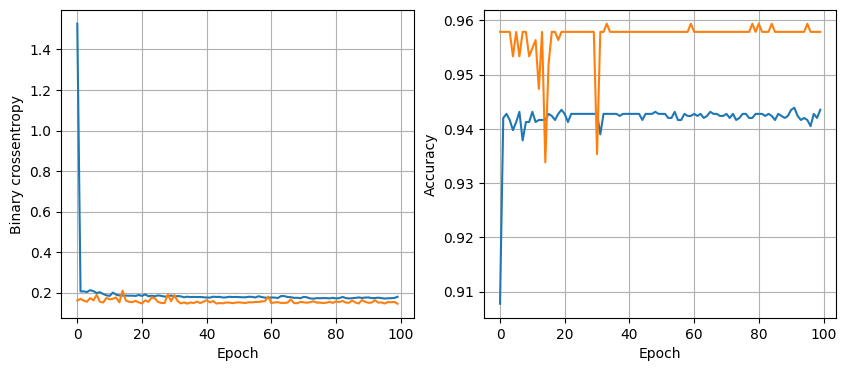

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9529 - loss: 0.1509 
16 nodes, dropout 0, lr 0.01, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



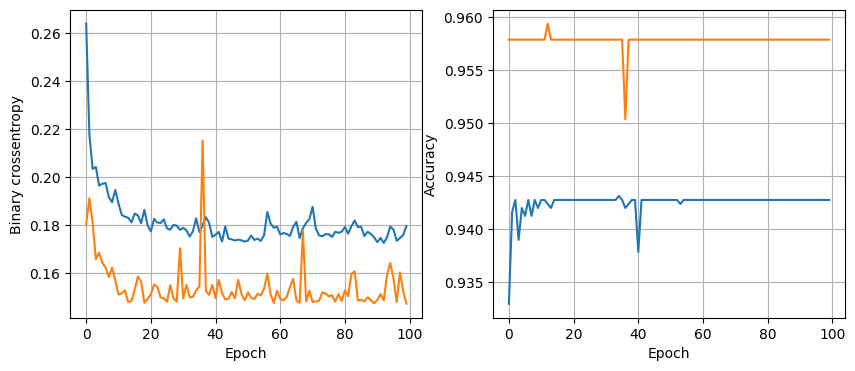

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9529 - loss: 0.1512 
16 nodes, dropout 0, lr 0.01, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



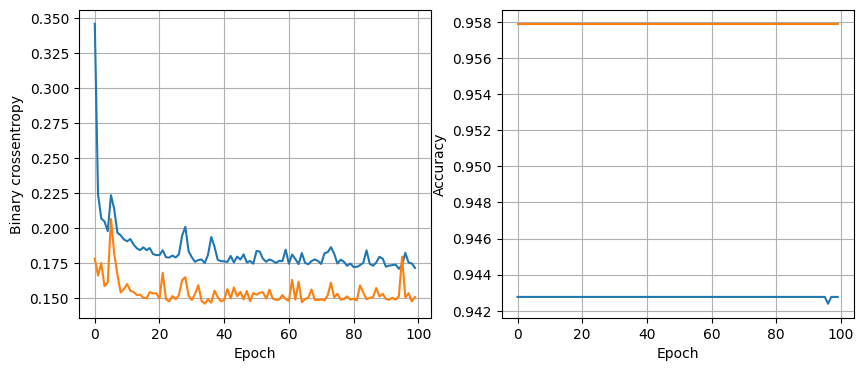

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9529 - loss: 0.1513 
16 nodes, dropout 0, lr 0.005, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



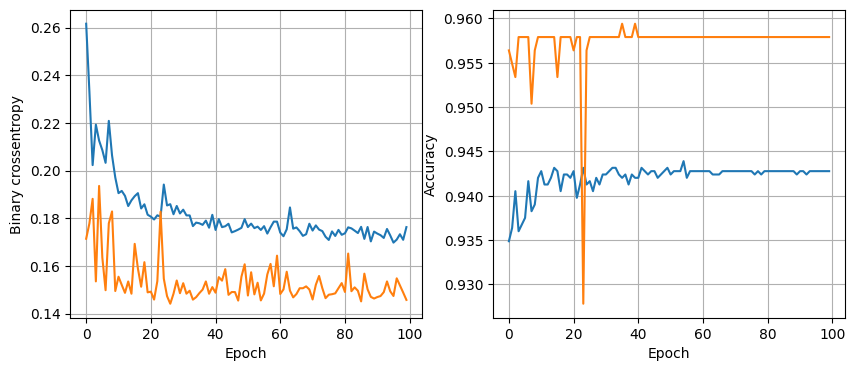

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9529 - loss: 0.1562 
16 nodes, dropout 0, lr 0.005, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



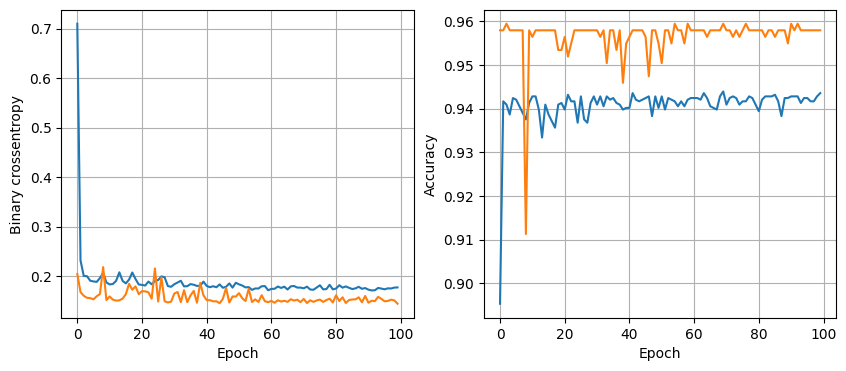

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9529 - loss: 0.1506
16 nodes, dropout 0, lr 0.005, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



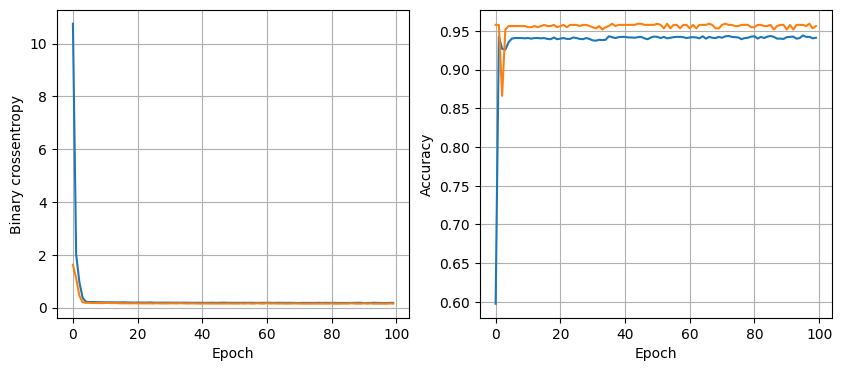

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9518 - loss: 0.1618
16 nodes, dropout 0, lr 0.001, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



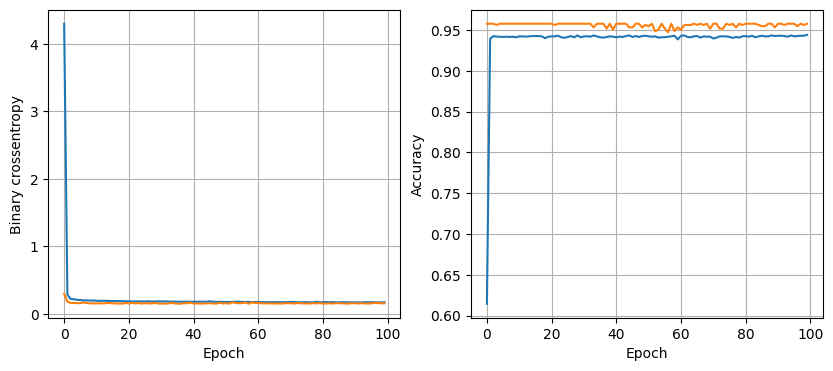

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9529 - loss: 0.1507  
16 nodes, dropout 0, lr 0.001, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



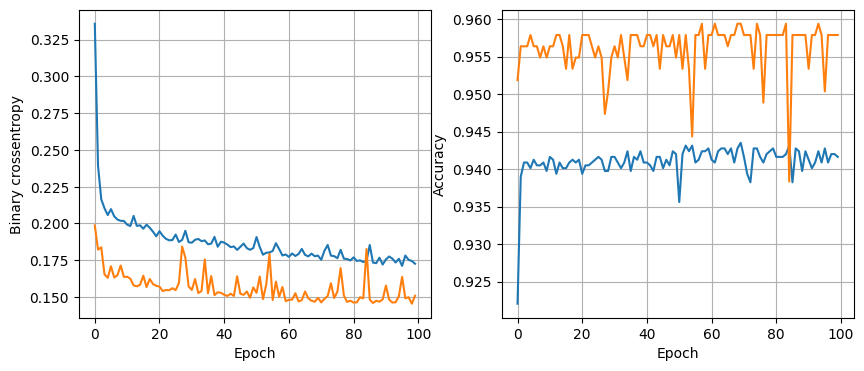

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1585
16 nodes, dropout 0, lr 0.001, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



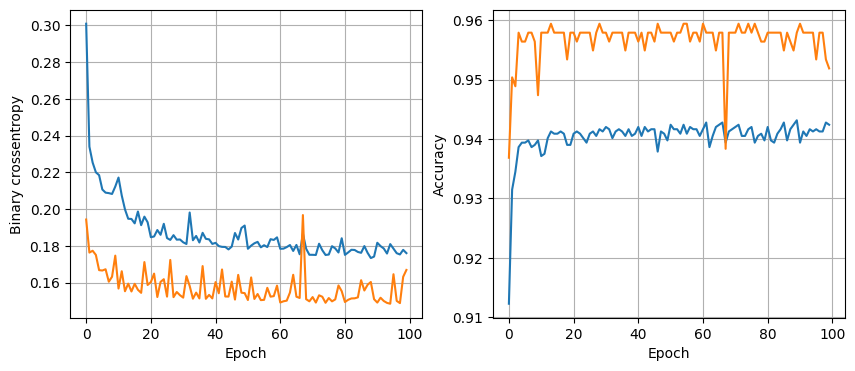

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9442 - loss: 0.1720
16 nodes, dropout 0.2, lr 0.01, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



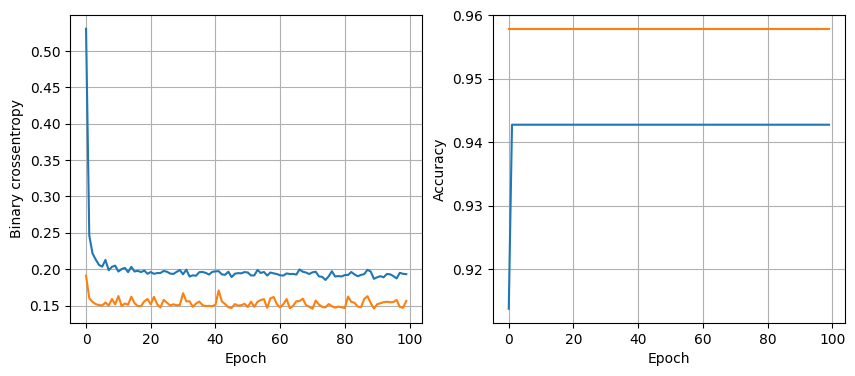

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1639
16 nodes, dropout 0.2, lr 0.01, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



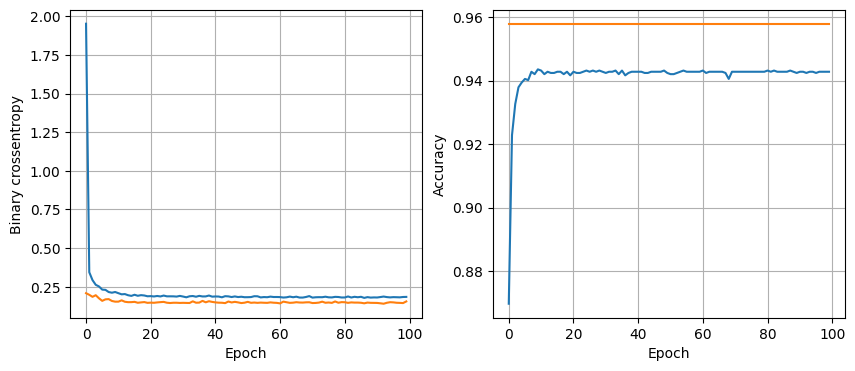

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9529 - loss: 0.1560
16 nodes, dropout 0.2, lr 0.01, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



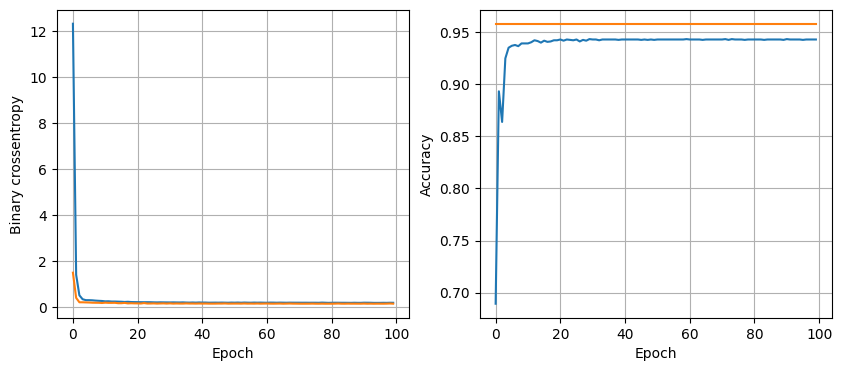

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9529 - loss: 0.1555 
16 nodes, dropout 0.2, lr 0.005, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



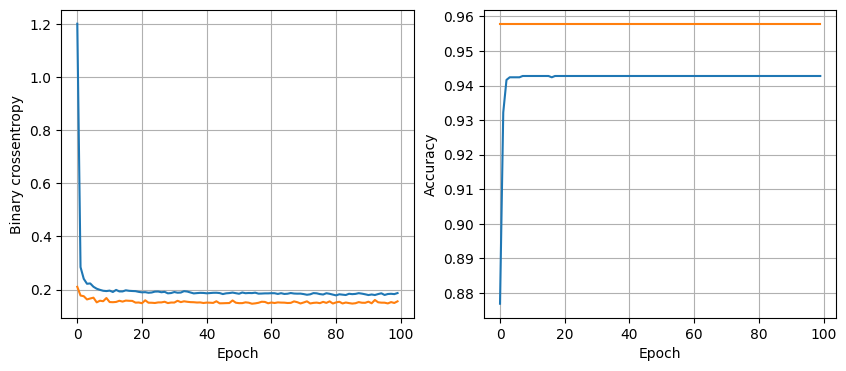

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9529 - loss: 0.1596 
16 nodes, dropout 0.2, lr 0.005, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



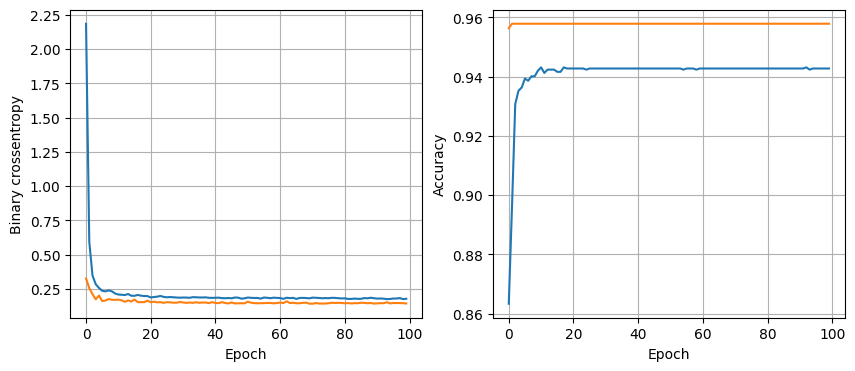

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1599
16 nodes, dropout 0.2, lr 0.005, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



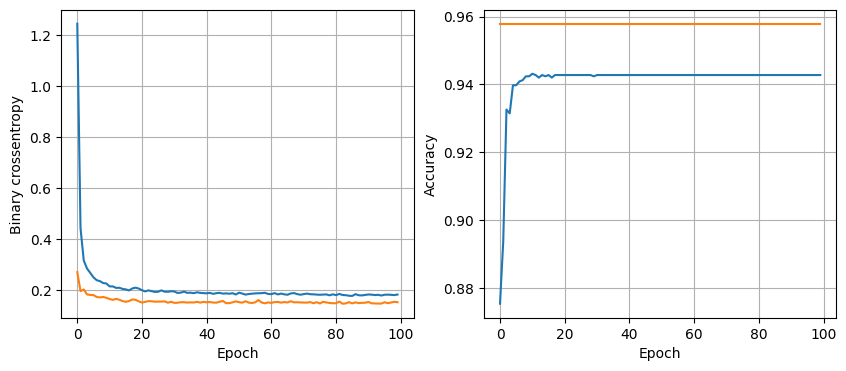

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9529 - loss: 0.1563 
16 nodes, dropout 0.2, lr 0.001, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



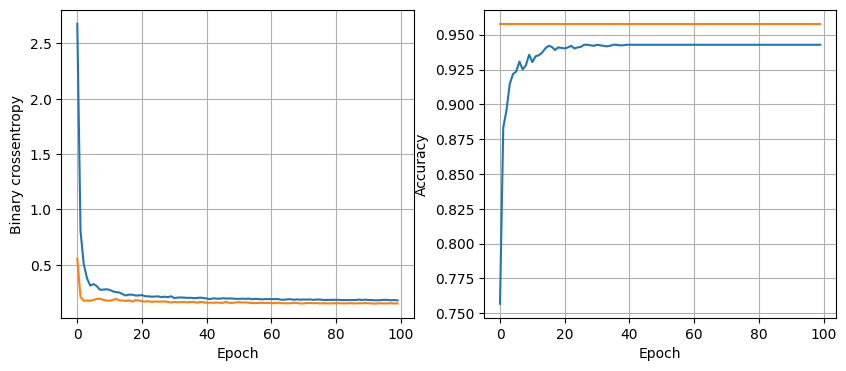

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1544
16 nodes, dropout 0.2, lr 0.001, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



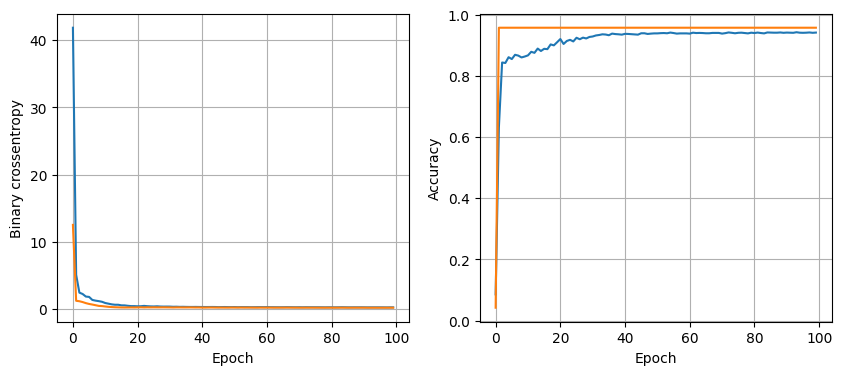

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9529 - loss: 0.1687 
16 nodes, dropout 0.2, lr 0.001, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



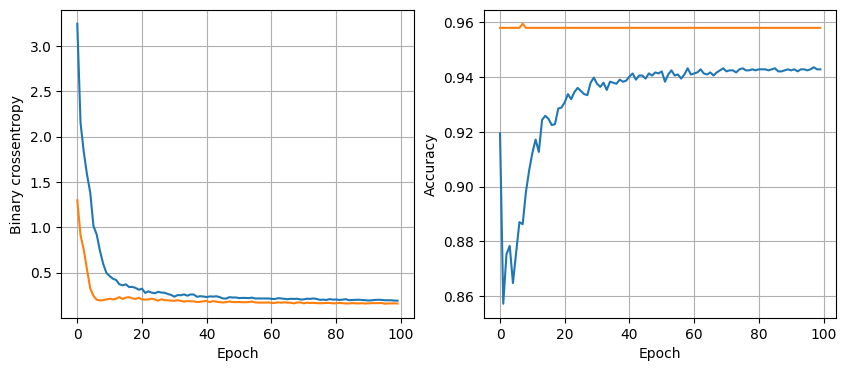

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9529 - loss: 0.1676
32 nodes, dropout 0, lr 0.01, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



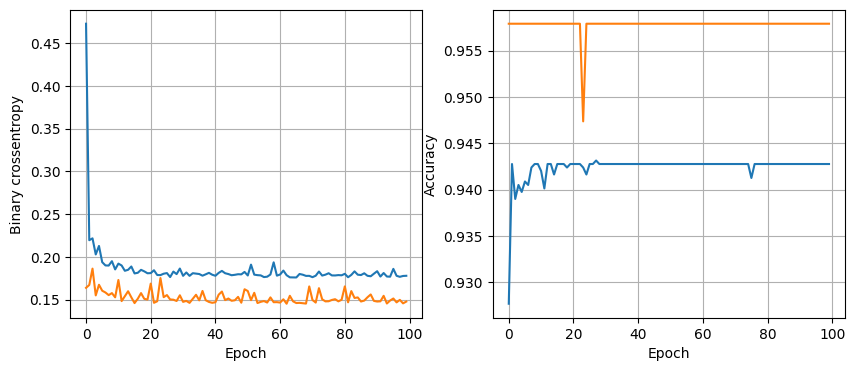

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1524
32 nodes, dropout 0, lr 0.01, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



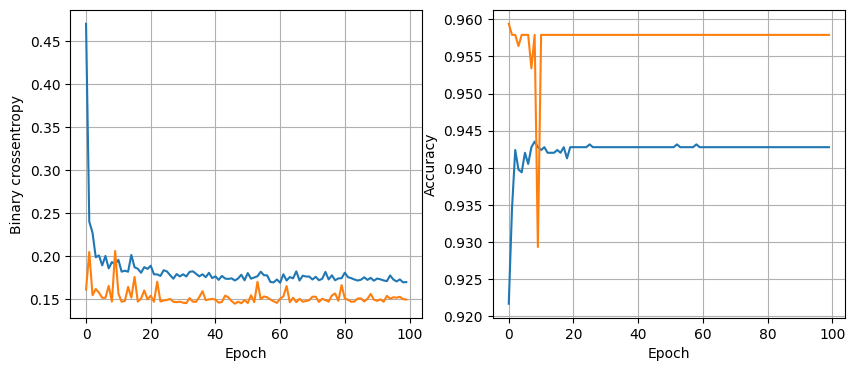

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1543
32 nodes, dropout 0, lr 0.01, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



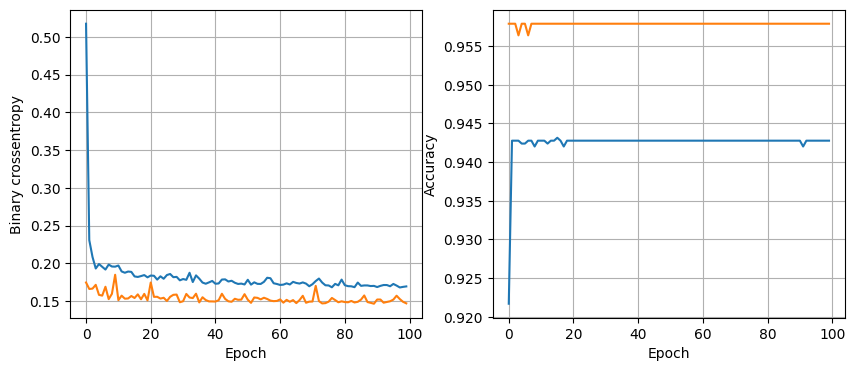

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1500
32 nodes, dropout 0, lr 0.005, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



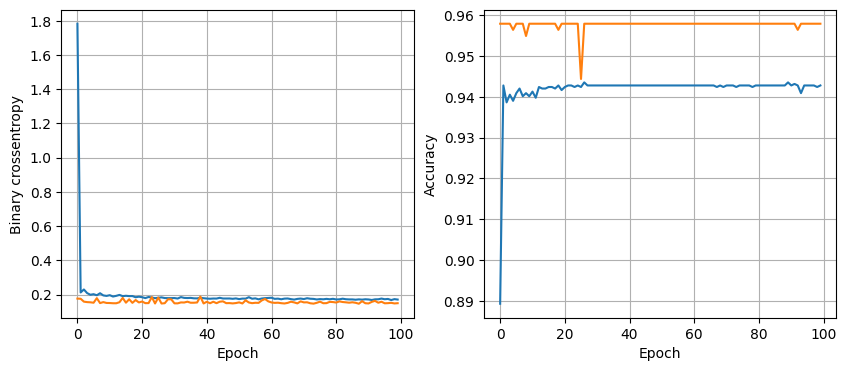

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9529 - loss: 0.1531
32 nodes, dropout 0, lr 0.005, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



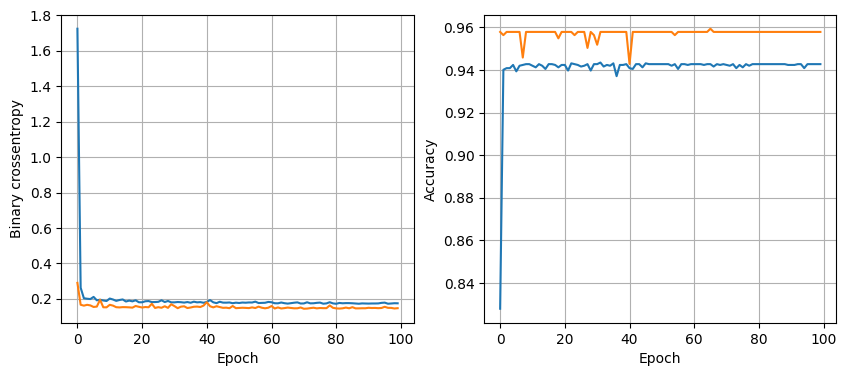

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1596
32 nodes, dropout 0, lr 0.005, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



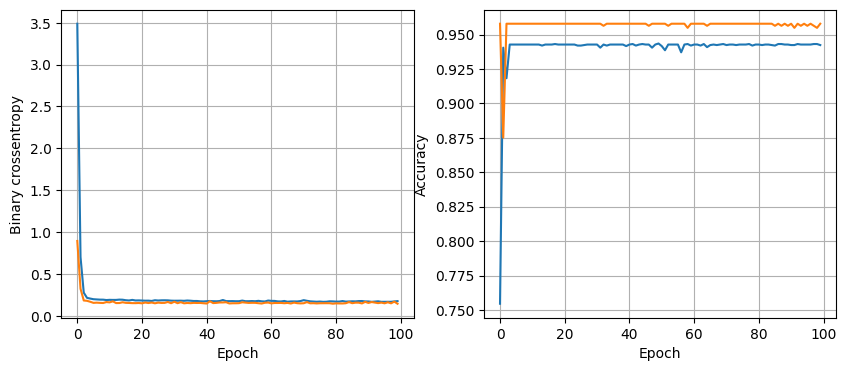

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1565
32 nodes, dropout 0, lr 0.001, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



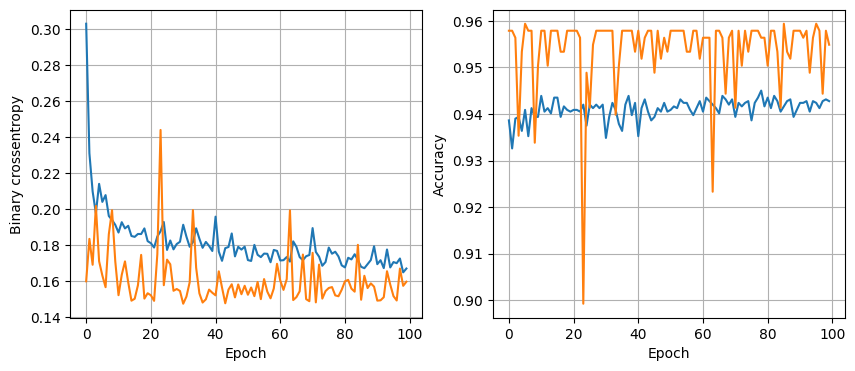

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9468 - loss: 0.1587
32 nodes, dropout 0, lr 0.001, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



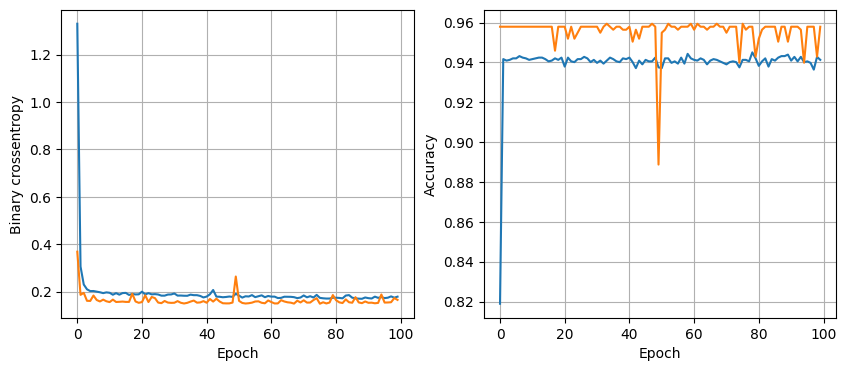

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1700
32 nodes, dropout 0, lr 0.001, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



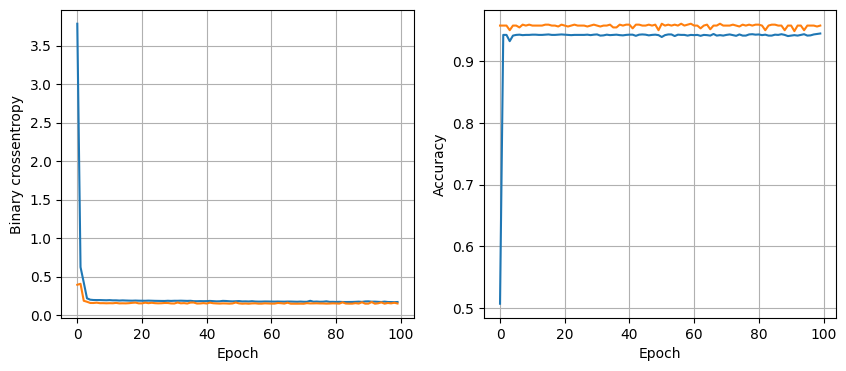

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1708
32 nodes, dropout 0.2, lr 0.01, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



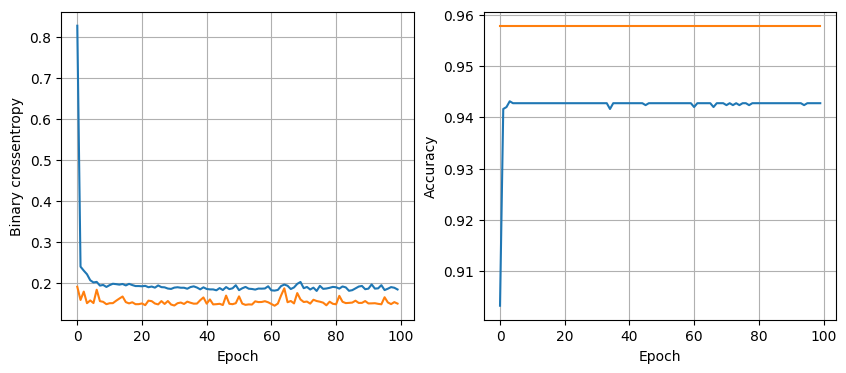

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9529 - loss: 0.1573 
32 nodes, dropout 0.2, lr 0.01, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



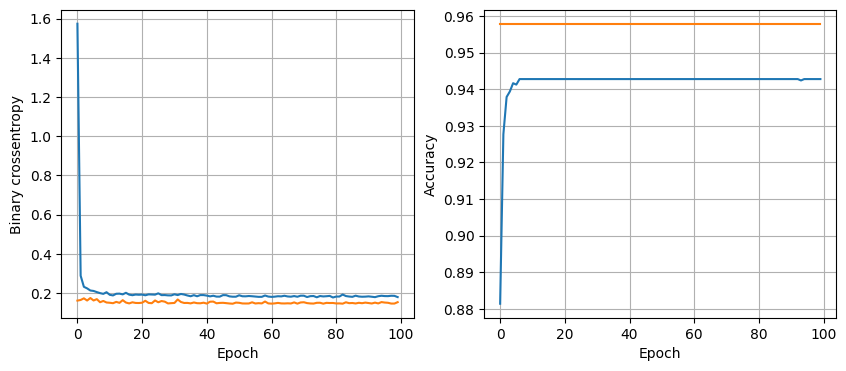

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1638
32 nodes, dropout 0.2, lr 0.01, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



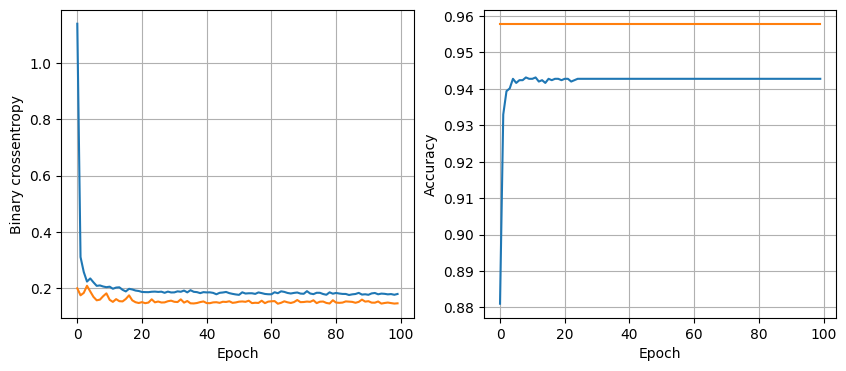

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9529 - loss: 0.1537
32 nodes, dropout 0.2, lr 0.005, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



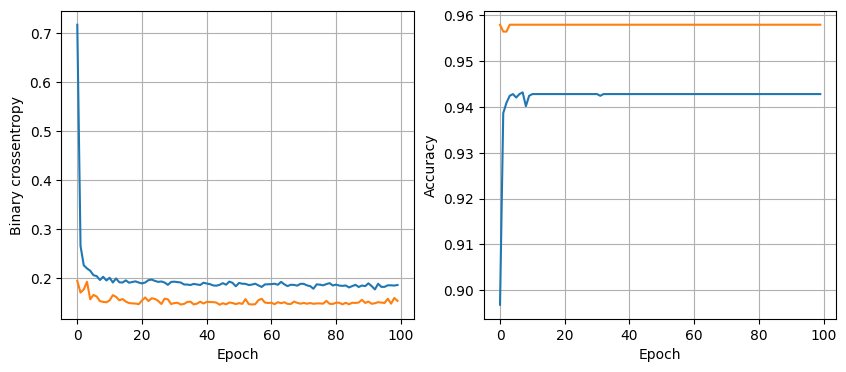

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1595
32 nodes, dropout 0.2, lr 0.005, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



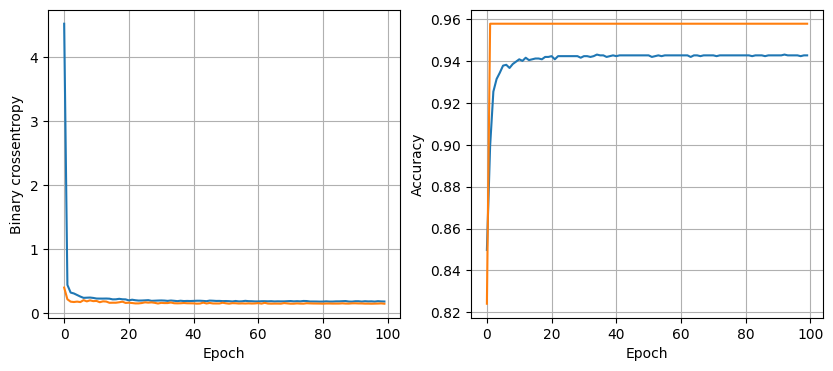

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1621
32 nodes, dropout 0.2, lr 0.005, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



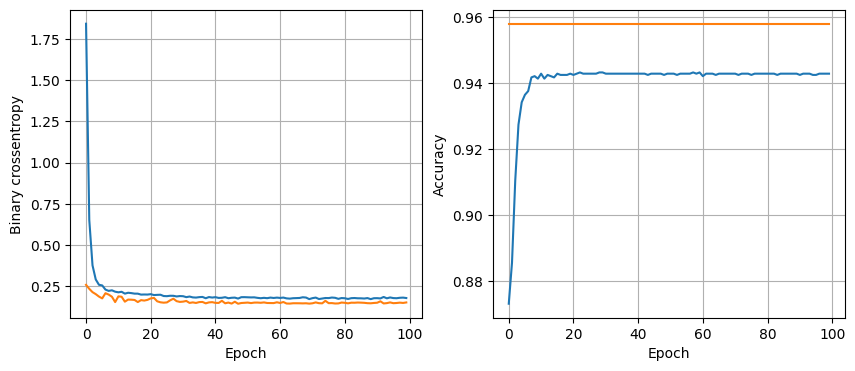

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1499
32 nodes, dropout 0.2, lr 0.001, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



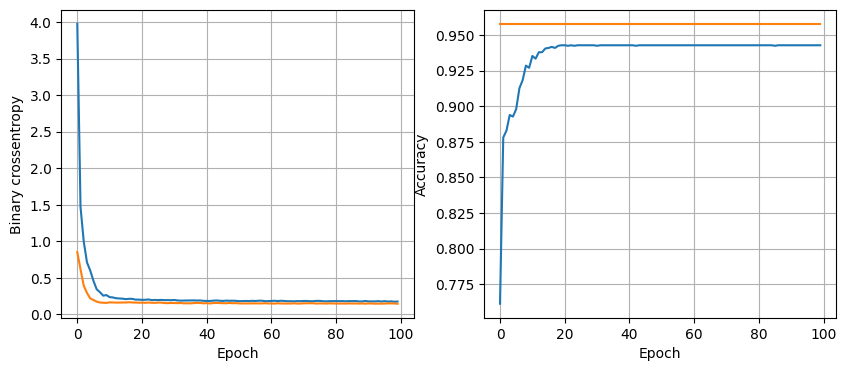

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1604
32 nodes, dropout 0.2, lr 0.001, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



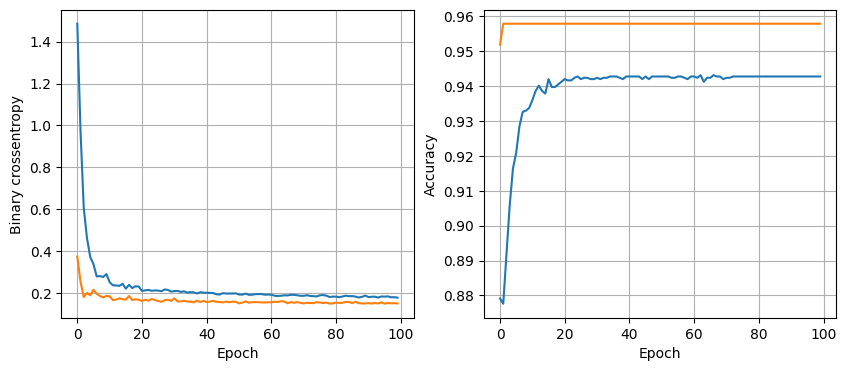

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1589
32 nodes, dropout 0.2, lr 0.001, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



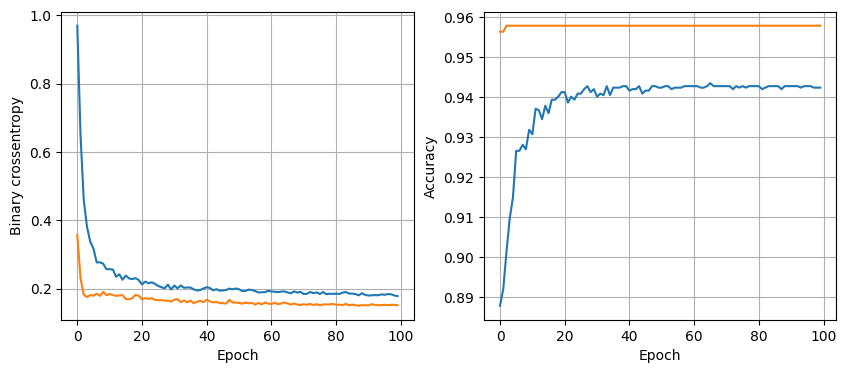

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1613
64 nodes, dropout 0, lr 0.01, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



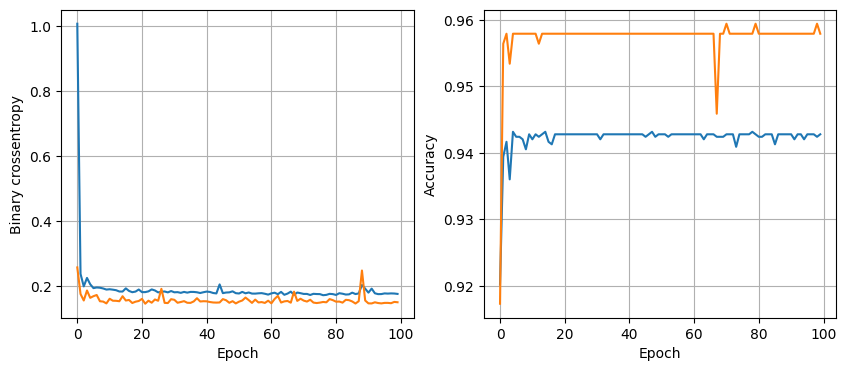

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9529 - loss: 0.1548
64 nodes, dropout 0, lr 0.01, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



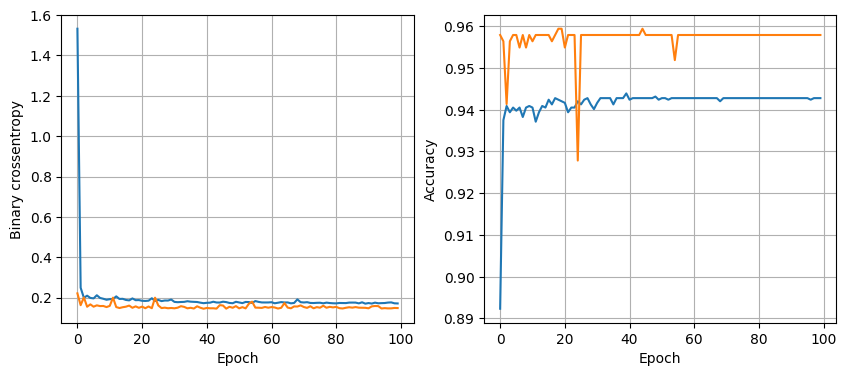

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1590
64 nodes, dropout 0, lr 0.01, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



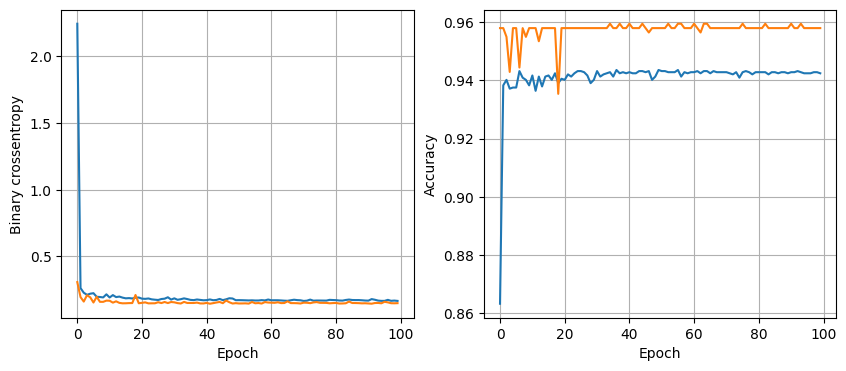

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1576
64 nodes, dropout 0, lr 0.005, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



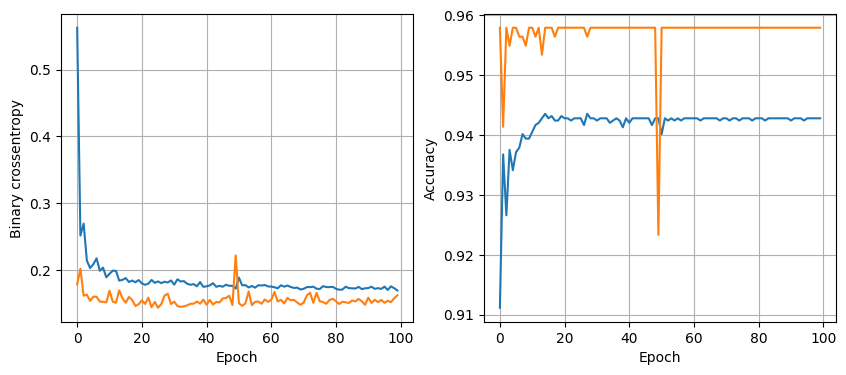

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1661
64 nodes, dropout 0, lr 0.005, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



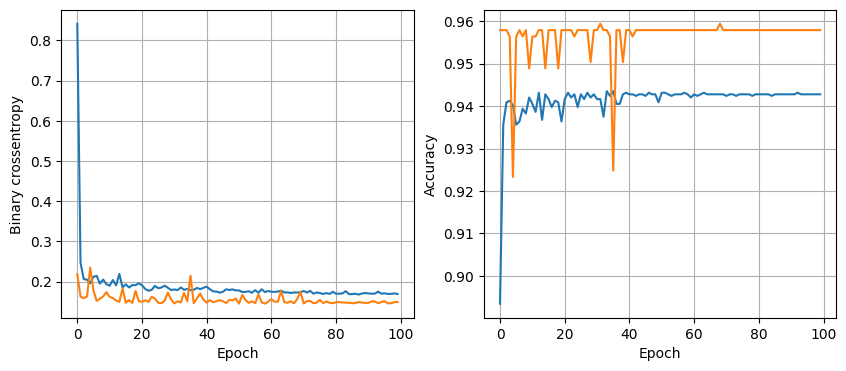

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9529 - loss: 0.1504 
64 nodes, dropout 0, lr 0.005, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



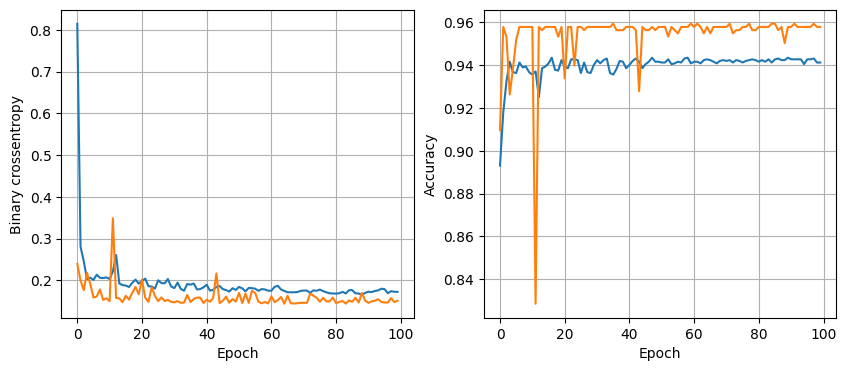

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9534 - loss: 0.1550
64 nodes, dropout 0, lr 0.001, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



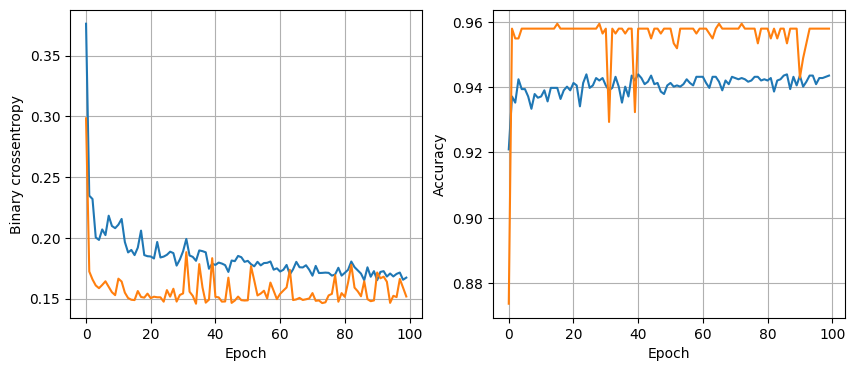

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9524 - loss: 0.1578
64 nodes, dropout 0, lr 0.001, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



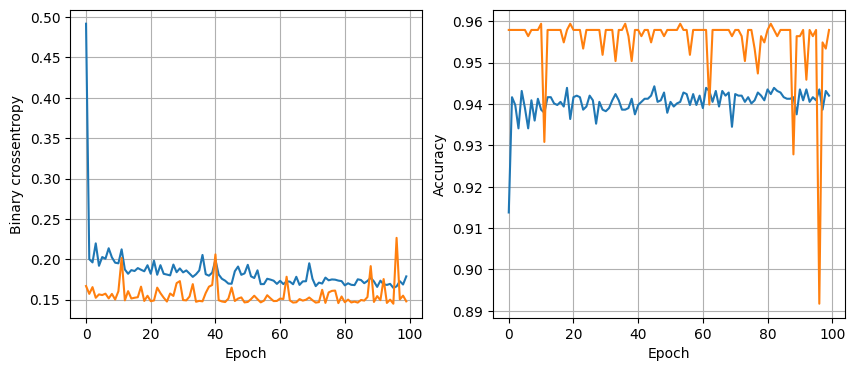

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1727
64 nodes, dropout 0, lr 0.001, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



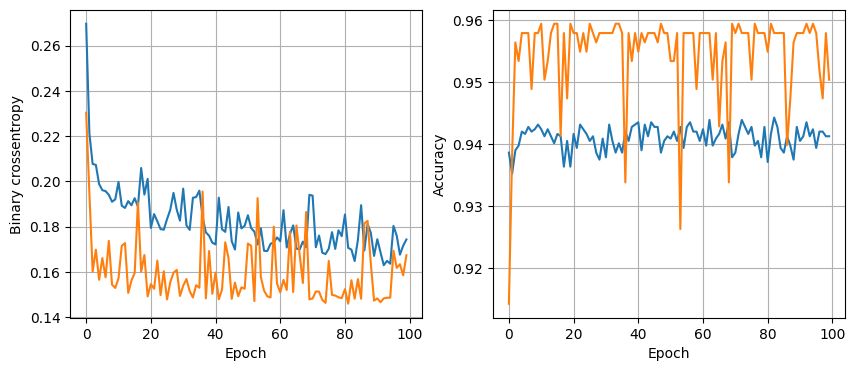

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9513 - loss: 0.1705
64 nodes, dropout 0.2, lr 0.01, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



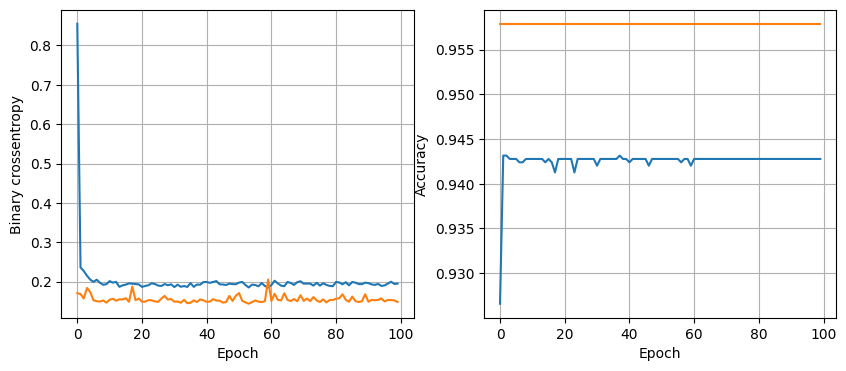

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1562
64 nodes, dropout 0.2, lr 0.01, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



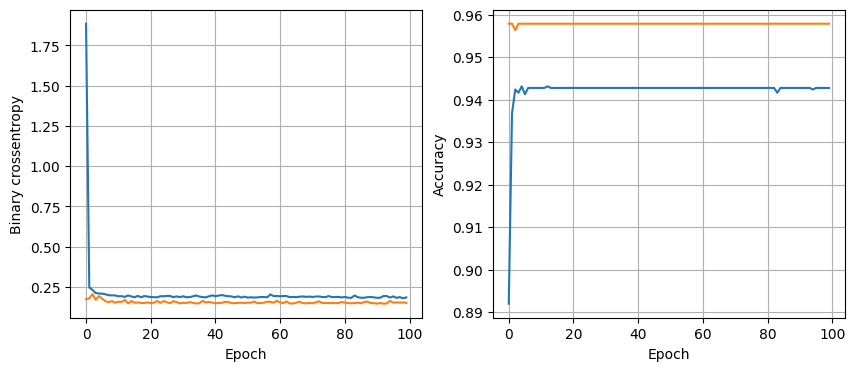

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9529 - loss: 0.1580
64 nodes, dropout 0.2, lr 0.01, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



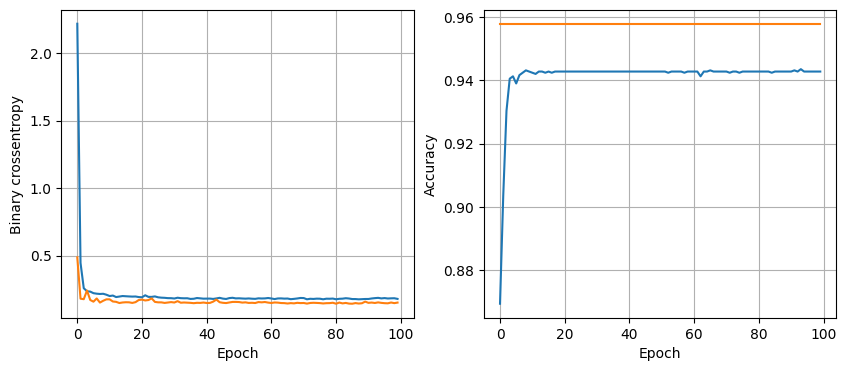

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1553
64 nodes, dropout 0.2, lr 0.005, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



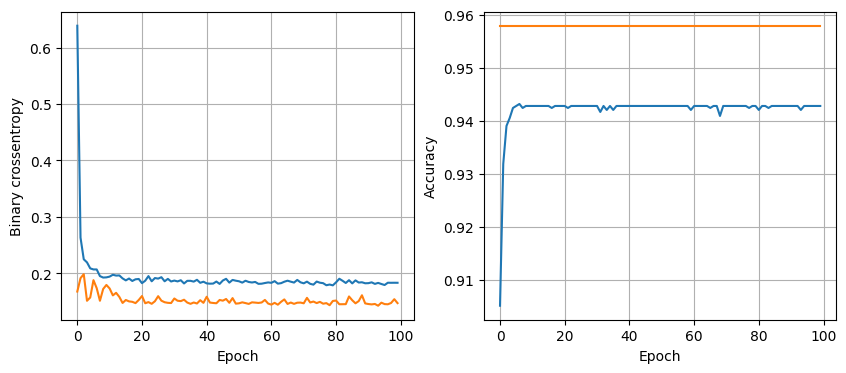

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1540
64 nodes, dropout 0.2, lr 0.005, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



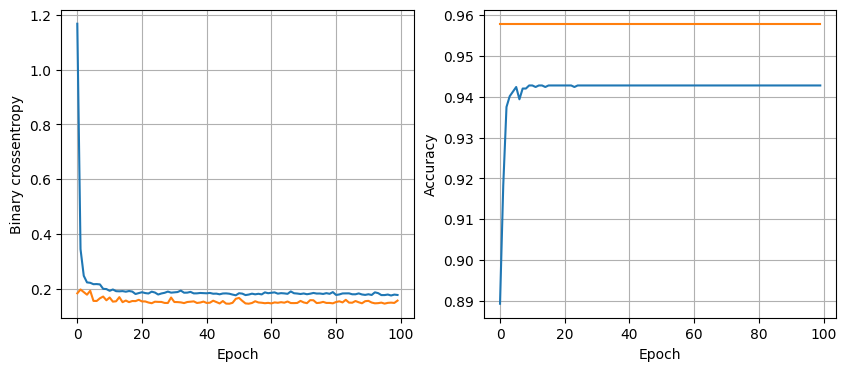

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1663
64 nodes, dropout 0.2, lr 0.005, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



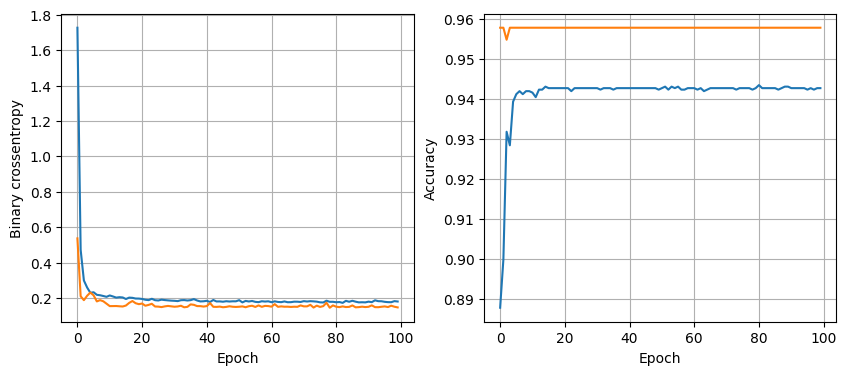

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1522
64 nodes, dropout 0.2, lr 0.001, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



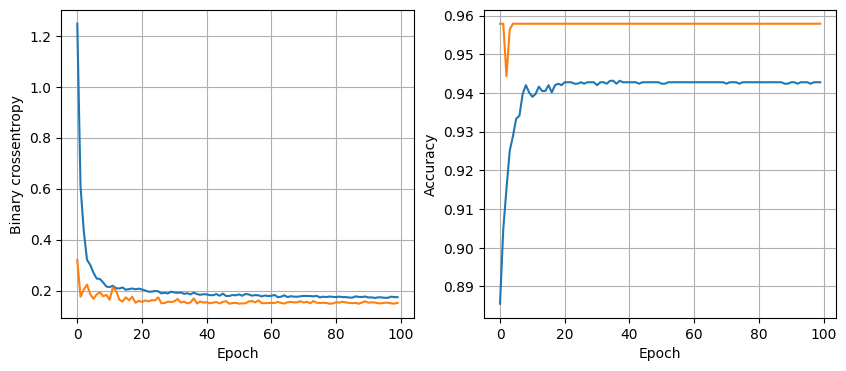

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9529 - loss: 0.1552
64 nodes, dropout 0.2, lr 0.001, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



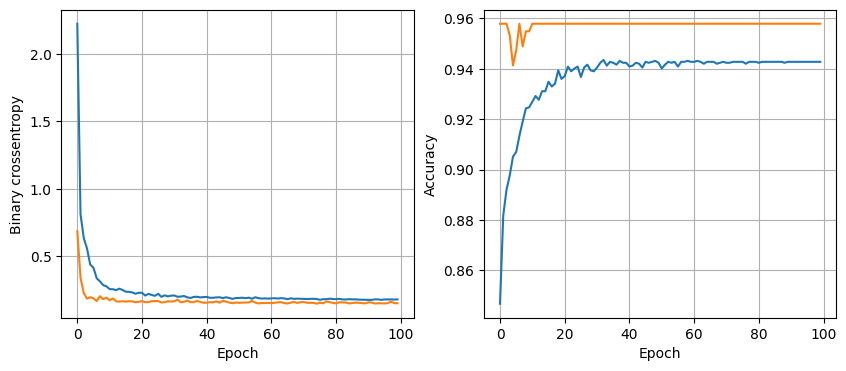

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1549
64 nodes, dropout 0.2, lr 0.001, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



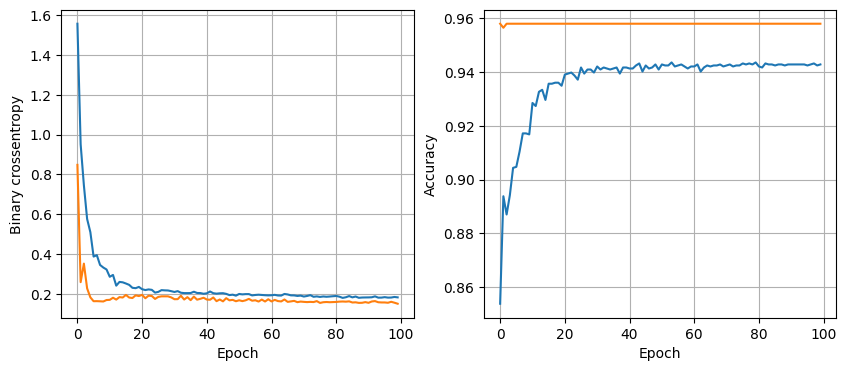

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1639


In [78]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_val, y_val)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [79]:
y_predict = least_loss_model.predict(x_test)
y_predict = (y_pred > 0.5).astype(int).reshape(-1,)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


As you can see LogisticRegression in the best model for this project